Predictions saved to 'predicted_suitability_scores.csv/xlsx'

Validation Set Performance:
[[577  98]
 [ 51 589]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       675
           1       0.86      0.92      0.89       640

    accuracy                           0.89      1315
   macro avg       0.89      0.89      0.89      1315
weighted avg       0.89      0.89      0.89      1315

Test Set Performance:
[[597  78]
 [ 44 597]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       675
           1       0.88      0.93      0.91       641

    accuracy                           0.91      1316
   macro avg       0.91      0.91      0.91      1316
weighted avg       0.91      0.91      0.91      1316

Test Set Performance:
Accuracy: 0.9073
Precision: 0.8844
Recall: 0.9314
F1 Score: 0.9073
Matthews Correlation Coefficient (MCC): 0.8158
Cohen's Kappa: 0.8147
Balanced Accuracy: 0.9079
Log 

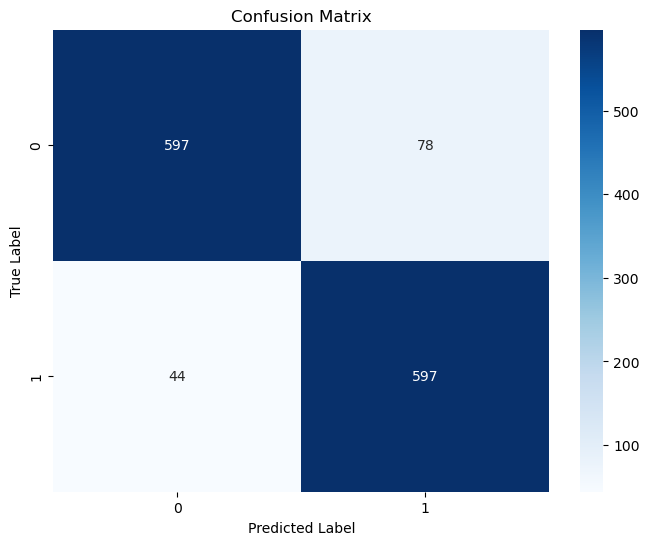

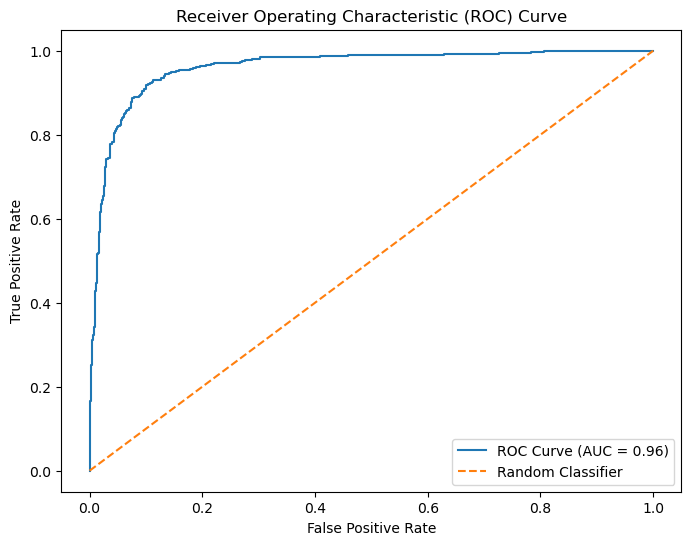

AUC-ROC Score: 0.9603


In [ ]:
# Multilayer perceptrons model (MLP) with best parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, log_loss, matthews_corrcoef, cohen_kappa_score, 
                             balanced_accuracy_score)

# Load the combined dataset

'''Here and below  data is a combination of wind turbines with random points from suitable area '''

data = pd.read_csv('The path to the data', 
                   sep=';', decimal=',')
# Replace NaN values if found
data.fillna(0, inplace=True)

# Save the x and y columns
columns_to_remove = ['X', 'Y']
removed_columns = data[columns_to_remove]

# Remove the x and y columns from the DataFrame
data = data.drop(columns=columns_to_remove)

# Randomly shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X = data.drop(columns=['suitability'])  # 'suitability' is the target column
y = data['suitability']

# Split the data into training, validation, and test sets (e.g., 70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(128, 128), 
#                     activation='tanh', 
#                     solver='adam', 
#                     alpha=0.01,
#                     max_iter=200, 
#                     random_state=42, 
#                     early_stopping=True, 
#                     validation_fraction=0.1)

# the MLPClassifier with best parameters
mlp = MLPClassifier(hidden_layer_sizes=(64, 128, 64), 
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.0001,
                    batch_size=128,
                    max_iter=200, 
                    random_state=42, 
                    early_stopping=True, 
                    learning_rate='constant', 
                    learning_rate_init=0.01)

mlp.fit(X_train_scaled, y_train)

# Predict probabilities for new points (without labels)
df_new_points = pd.read_csv('The path to the data', 
                            sep=';', decimal=',')
# Replace NaN values if found
df_new_points.fillna(0, inplace=True)

# Save the x and y columns for new data
removed_columns_new = df_new_points[columns_to_remove]
df_new_points = df_new_points.drop(columns=columns_to_remove)

X_new_points = scaler.transform(df_new_points)
y_new_pred_probs = mlp.predict_proba(X_new_points)[:, 1]  # Probability of being suitable

# Add predictions to the new points DataFrame
df_new_points["suitability_score"] = y_new_pred_probs

# Restore the x and y columns in the final DataFrame
df_new_points[columns_to_remove] = removed_columns_new

# Save results to a CSV
df_new_points.to_csv("The path to predicted_scores.csv",
                     sep=';', decimal=',', index=False)

# Save results to an Excel
df_new_points.to_excel("The path to predicted_scores.xlsx")

print("Predictions saved to 'predicted_suitability_scores.csv/xlsx'")

# Evaluate the model
print("\nValidation Set Performance:")
y_val_pred = mlp.predict(X_val_scaled)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("Test Set Performance:")
y_test_pred = mlp.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Compute metrics
y_pred_test = mlp.predict(X_test_scaled)
y_pred_proba_test = mlp.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mcc = matthews_corrcoef(y_test, y_pred_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
log_loss_value = log_loss(y_test, y_pred_proba_test)

# Print metrics
print("Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"AUC-ROC Score: {auc:.4f}")


In [ ]:
# Deleting zero from the dataset

import pandas as pd

# Parameters
input_file = '/mlp/inputXY.csv'  # Input file
output_file = '/mlp/inputXY_no0.csv'  # Output file
columns = ['Wind_speed_100m', 'Power_density_100m', 'Natura 2000 network (habitats)',
           'Natura 2000 network (birds)', 'National parks', 'Landscape parks', 'Reserves',
           'Natural landscape complexes', 'Ecological sites', 'Documentation posts', 'Protected landscape areas',
           'Monuments of nature points', 'Monuments of nature polygons', 'adms', 'bubd', 'kusc', 'kuza', 'oimk',
           'ptlz', 'ptut', 'ptwp', 'ptwz', 'skdr', 'suln', 'swkn', 'swrm', 'swrs'
          ]  # List of columns
value_to_remove = 0  # Value to remove

# Read the file
df = pd.read_csv(input_file, sep=';', decimal=',')

# column_names = df.columns.tolist()
# print("List of column names:", column_names)

# Number of rows before filtering
initial_row_count = len(df)

# Filtering rows
for column in columns:
    df = df[df[column] != value_to_remove]

# Number of rows after filtering
final_row_count = len(df)

# Calculate the number of removed rows
removed_rows = initial_row_count - final_row_count

# Save the result
df.to_csv(output_file, sep=';', decimal=',', index=False)

print(f"{removed_rows} row(s) were removed. The file has been saved as '{output_file}'.")


3363 row(s) were removed. The file has been saved as '/Users/arturamsaruk/Desktop/Germany/Work/Python - ML/v.2/mlp/inputXY_no0.csv'.


In [ ]:
# Deleting zero from the new points dataset

import pandas as pd

# Parameters
input_file = '/RP_100k_PL_XY.csv'  # Input file
output_file = '/RP_100k_PL_XY_no0.csv'  # Output file
columns = ['Wind_speed_100m', 'Power_density_100m', 'Natura 2000 network (habitats)',
           'Natura 2000 network (birds)', 'National parks', 'Landscape parks', 'Reserves',
           'Natural landscape complexes', 'Ecological sites', 'Documentation posts', 'Protected landscape areas',
           'Monuments of nature points', 'Monuments of nature polygons', 'adms', 'bubd', 'kusc', 'kuza', 'oimk',
           'ptlz', 'ptut', 'ptwp', 'ptwz', 'skdr', 'suln', 'swkn', 'swrm', 'swrs'
          ]  # List of columns
value_to_remove = 0  # Value to remove

# Read the file
df = pd.read_csv(input_file, sep=';', decimal='.')

# column_names = df.columns.tolist()
# print("List of column names:", column_names)

# Number of rows before filtering
initial_row_count = len(df)

# Filtering rows
for column in columns:
    df = df[df[column] != value_to_remove]

# Number of rows after filtering
final_row_count = len(df)

# Calculate the number of removed rows
removed_rows = initial_row_count - final_row_count

# Save the result
df.to_csv(output_file, sep=';', decimal=',', index=False)

print(f"{removed_rows} row(s) were removed. The file has been saved as '{output_file}'.")


60669 row(s) were removed. The file has been saved as '/Users/arturamsaruk/Desktop/Germany/Work/Distances/RP_100k_PL/RP_100k_PL_XY_no0.csv'.


Predictions saved to 'predicted_suitability_scores_no0.csv/xlsx'

Validation Set Performance:
[[201  58]
 [ 46 506]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       259
           1       0.90      0.92      0.91       552

    accuracy                           0.87       811
   macro avg       0.86      0.85      0.85       811
weighted avg       0.87      0.87      0.87       811

Test Set Performance:
[[201  58]
 [ 33 519]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       259
           1       0.90      0.94      0.92       552

    accuracy                           0.89       811
   macro avg       0.88      0.86      0.87       811
weighted avg       0.89      0.89      0.89       811

Test Set Performance:
Accuracy: 0.8878
Precision: 0.8995
Recall: 0.9402
F1 Score: 0.9194
Matthews Correlation Coefficient (MCC): 0.7371
Cohen's Kappa: 0.7351
Balanced Accuracy: 0.8581


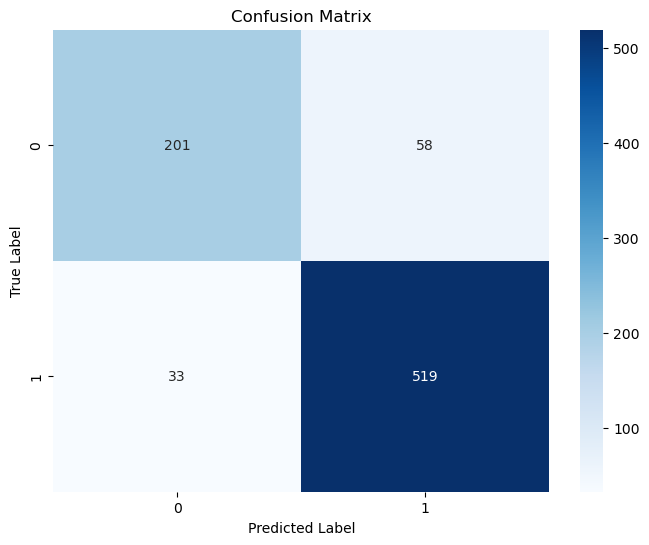

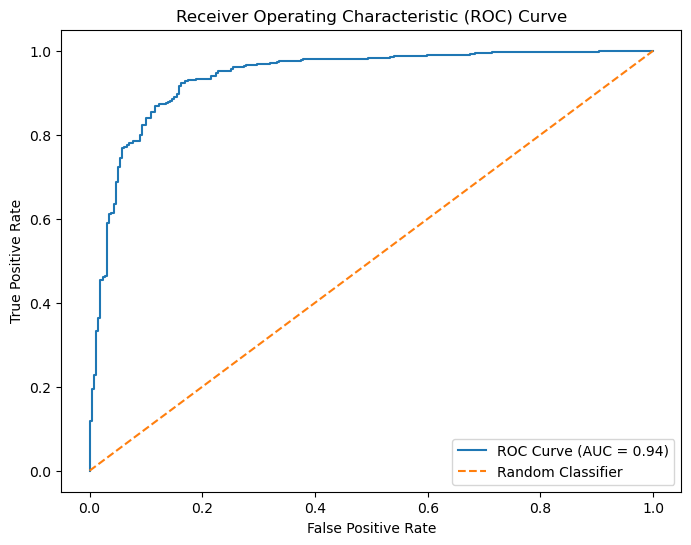

AUC-ROC Score: 0.9380


In [ ]:
''' Multilayer perceptrons model (MLP) with best model parameters. No zero in input data '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, log_loss, matthews_corrcoef, cohen_kappa_score, 
                             balanced_accuracy_score)

# Load the combined dataset
data = pd.read_csv('The path to the data', 
                   sep=';', decimal=',')
# Replace NaN values if found
data.fillna(0, inplace=True)

# Save the x and y columns
columns_to_remove = ['X', 'Y']
removed_columns = data[columns_to_remove]

# Remove the x and y columns from the DataFrame
data = data.drop(columns=columns_to_remove)

# Randomly shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X = data.drop(columns=['suitability'])  # 'suitability' is the target column
y = data['suitability']

# Split the data into training, validation, and test sets (e.g., 70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(128, 128), 
#                     activation='tanh', 
#                     solver='adam', 
#                     alpha=0.01,
#                     max_iter=200, 
#                     random_state=42, 
#                     early_stopping=True, 
#                     validation_fraction=0.1)

mlp = MLPClassifier(hidden_layer_sizes=(64, 128, 64), 
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.0001,
                    batch_size=128,
                    max_iter=200, 
                    random_state=42, 
                    early_stopping=True, 
                    learning_rate='constant', 
                    learning_rate_init=0.01)

mlp.fit(X_train_scaled, y_train)

# Predict probabilities for new points (without labels)
df_new_points = pd.read_csv('The path to /RP_100k_PL_XY_no0.csv', 
                            sep=';', decimal=',')
# Replace NaN values if found
df_new_points.fillna(0, inplace=True)

# Save the x and y columns for new data
removed_columns_new = df_new_points[columns_to_remove]
df_new_points = df_new_points.drop(columns=columns_to_remove)

X_new_points = scaler.transform(df_new_points)
y_new_pred_probs = mlp.predict_proba(X_new_points)[:, 1]  # Probability of being suitable

# Add predictions to the new points DataFrame
df_new_points["suitability_score"] = y_new_pred_probs

# Restore the x and y columns in the final DataFrame
df_new_points[columns_to_remove] = removed_columns_new

# Save results to a CSV
df_new_points.to_csv("/predicted_scores_no0.csv",
                     sep=';', decimal=',', index=False)

# Save results to an Excel
df_new_points.to_excel("/predicted_scores_no0.xlsx")

print("Predictions saved to 'predicted_suitability_scores_no0.csv/xlsx'")

# Evaluate the model
print("\nValidation Set Performance:")
y_val_pred = mlp.predict(X_val_scaled)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("Test Set Performance:")
y_test_pred = mlp.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Compute metrics
y_pred_test = mlp.predict(X_test_scaled)
y_pred_proba_test = mlp.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mcc = matthews_corrcoef(y_test, y_pred_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
log_loss_value = log_loss(y_test, y_pred_proba_test)

# Print metrics
print("Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show() 

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"AUC-ROC Score: {auc:.4f}")
